In [6]:
import os
import pandas as pd

# Load the stress data and the example additional file for uid u01
stress_data = pd.read_csv('./EMA/stress.csv')
stress_data['day_formatted'] = stress_data['day'].str.split('.').str[0]  # Remove any decimals and normalize the date format


# Base directory where the files are stored
base_dir = './Calls'

# List of UIDs to process
uids = stress_data['uid'].unique()

# Empty DataFrame to collect all merged results
all_merged_data = pd.DataFrame()

for uid in uids:
    # Load stress data for the current UID
    stress_data_uid = stress_data[stress_data['uid'] == uid]

    # Construct the file path for the corresponding additional data file
    file_path = os.path.join(base_dir, f'final_{uid}.csv')
    
    # Check if the file exists before attempting to load
    if os.path.exists(file_path):
        additional_data = pd.read_csv(file_path)
        
        # Merge stress data with additional data on the standardized date field
        merged_data = pd.merge(stress_data_uid, additional_data, left_on='day_formatted', right_on='date', how='inner')
        
        # Append the merged data to the all_merged_data DataFrame
        all_merged_data = pd.concat([all_merged_data, merged_data], ignore_index=True)

# Output the combined dataset
print(all_merged_data.head())

# Save the combined dataset to a CSV file
all_merged_data.to_csv('combined_data.csv', index=False)


            day  level  uid day_formatted        date  number_of_calls  \
0    2013-03-27    1.0  u04    2013-03-27  2013-03-27             24.0   
1    2013-03-27    1.0  u04    2013-03-27  2013-03-27             24.0   
2  2013-03-27.1    4.0  u04    2013-03-27  2013-03-27             24.0   
3  2013-03-27.1    4.0  u04    2013-03-27  2013-03-27             24.0   
4    2013-03-28    1.0  u04    2013-03-28  2013-03-28             24.0   

   number_of_sms  duration_hours  number_of_deadlines  
0           24.0        6.983889                  0.0  
1           24.0        6.983889                  0.0  
2           24.0        6.983889                  0.0  
3           24.0        6.983889                  0.0  
4           24.0        7.015556                  0.0  


In [11]:
# Retry loading the PHQ-9 Pre and Post intervention data
phq9_pre_data = pd.read_csv('./data/PHQ-9/PHQ-9_Pre.csv')
phq9_post_data = pd.read_csv('./data/PHQ-9/PHQ-9_Post.csv')

# Display the first few rows and column names of both datasets to understand their structure
(phq9_pre_data.head(), phq9_pre_data.columns, phq9_post_data.head(), phq9_post_data.columns)


(   uid type  Little interest or pleasure in doing things  \
 0  u00  Pre                                            0   
 1  u01  Pre                                            1   
 2  u02  Pre                                            2   
 3  u03  Pre                                            0   
 4  u04  Pre                                            1   
 
    Feeling down, depressed, hopeless.  \
 0                                   1   
 1                                   1   
 2                                   1   
 3                                   1   
 4                                   1   
 
    Trouble falling or staying asleep, or sleeping too much.  \
 0                                                  0          
 1                                                  1          
 2                                                  2          
 3                                                  0          
 4                                                  0     

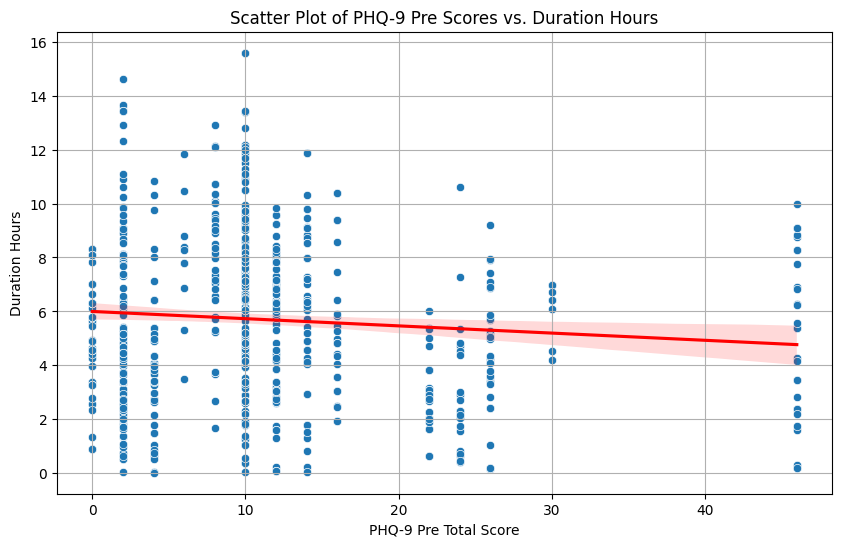

(-0.08645235247546876, 0.012935088565755318)

In [14]:
from scipy.stats import pearsonr
from matplotlib import pyplot as plt
import seaborn as sns
# Merge the PHQ-9 Pre data with the combined dataset on 'uid'
combined_data_with_phq9_pre = pd.merge(all_merged_data, phq9_pre_data[['uid', 'total_score']], on='uid', how='inner', suffixes=('', '_phq9_pre'))

# Display the merged data to verify correctness
combined_data_with_phq9_pre.head(), combined_data_with_phq9_pre.columns


# Drop rows with NaN values in 'total_score' and 'duration_hours'
analysis_data_phq9_duration = combined_data_with_phq9_pre.dropna(subset=['total_score', 'duration_hours'])

# Calculate Pearson correlation
correlation_coefficient_phq9_duration, p_value_phq9_duration = pearsonr(analysis_data_phq9_duration['total_score'], analysis_data_phq9_duration['duration_hours'])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_score', y='duration_hours', data=analysis_data_phq9_duration)
sns.regplot(x='total_score', y='duration_hours', data=analysis_data_phq9_duration, scatter=False, color='red')
plt.title('Scatter Plot of PHQ-9 Pre Scores vs. Duration Hours')
plt.xlabel('PHQ-9 Pre Total Score')
plt.ylabel('Duration Hours')
plt.grid(True)
plt.show()

# Output correlation results
correlation_coefficient_phq9_duration, p_value_phq9_duration


The correlation analysis between PHQ-9 Pre scores and duration hours (the time spent on calls) resulted in a correlation coefficient of 
−0.086. This indicates a very weak negative association. However, the p-value of approximately 
0.013 suggests that this correlation is statistically significant at the conventional 0.05 level.

The scatter plot displays a broad distribution of points with a subtle downward trend, supporting the weak negative correlation coefficient. This suggests that as depression scores increase slightly, the duration of calls tends to decrease slightly.

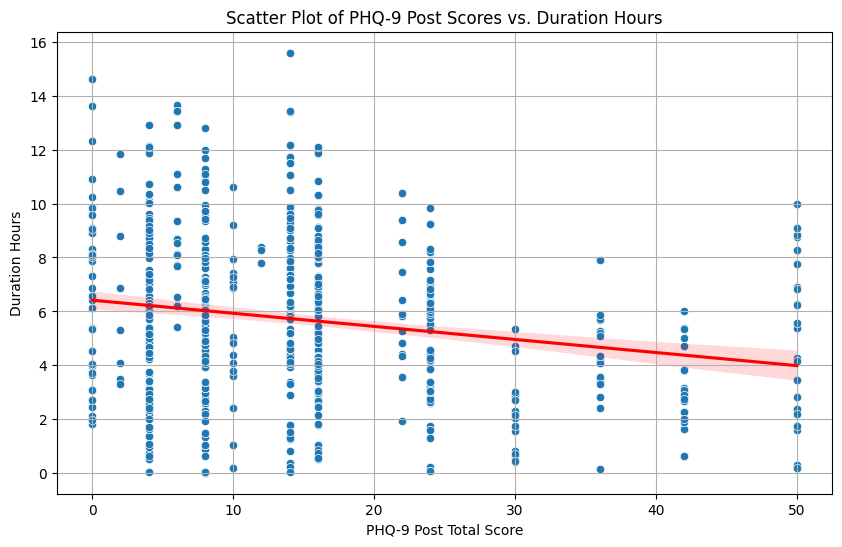

Pearson correlation coefficient: -0.1897648655123868
P-value: 3.893084286354537e-08


In [15]:
combined_data_with_phq9_post = pd.merge(all_merged_data, phq9_post_data[['uid', 'total_score']], on='uid', how='inner', suffixes=('', '_phq9_post'))

# Clean data by dropping rows with NaN values in 'total_score' and 'duration_hours'
analysis_data_phq9_post_duration = combined_data_with_phq9_post.dropna(subset=['total_score', 'duration_hours'])

# Calculate Pearson correlation
correlation_coefficient_phq9_post_duration, p_value_phq9_post_duration = pearsonr(analysis_data_phq9_post_duration['total_score'], analysis_data_phq9_post_duration['duration_hours'])

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_score', y='duration_hours', data=analysis_data_phq9_post_duration)
sns.regplot(x='total_score', y='duration_hours', data=analysis_data_phq9_post_duration, scatter=False, color='red')
plt.title('Scatter Plot of PHQ-9 Post Scores vs. Duration Hours')
plt.xlabel('PHQ-9 Post Total Score')
plt.ylabel('Duration Hours')
plt.grid(True)
plt.show()

# Output correlation results
print("Pearson correlation coefficient:", correlation_coefficient_phq9_post_duration)
print("P-value:", p_value_phq9_post_duration)

The correlation analysis between PHQ-9 Post scores and duration hours resulted in a correlation coefficient of 
−0.190, indicating a weak negative association. The p-value is extremely small (approximately 
3.89×10^−8
 ), which suggests that this correlation is statistically significant.

The scatter plot shows a broad distribution of points with a subtle downward trend, reflecting the weak negative correlation. This suggests that individuals with higher post-treatment depression scores (PHQ-9 Post) tend to spend slightly less time on calls.